In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit

path = '/Users/dzzxjl/PycharmProjects/kaggle/leaf'
train = pd.read_csv(path + '/input/train.csv')
test = pd.read_csv(path + '/input/test.csv')

In [4]:
test.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,780.673401,0.017562,0.028425,0.031858,0.022556,0.014527,0.037497,0.019222,0.001085,0.007092,...,0.035291,0.005923,0.015033,0.011762,0.015881,0.011217,0.002617,0.019975,0.009389,0.020970
std,465.646977,0.019585,0.038351,0.025719,0.028797,0.018029,0.051372,0.017122,0.002697,0.009515,...,0.064482,0.026934,0.022318,0.024771,0.014898,0.052530,0.011204,0.034704,0.013457,0.023407
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.500000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,774.000000,0.009766,0.010743,0.023438,0.013672,0.007812,0.013672,0.015625,0.000000,0.005859,...,0.003906,0.000000,0.005859,0.001953,0.012695,0.000000,0.000000,0.003418,0.002930,0.013184
75%,1184.500000,0.028809,0.041016,0.042969,0.027344,0.019531,0.056641,0.029297,0.000000,0.007812,...,0.038086,0.000000,0.019531,0.010498,0.022461,0.000000,0.000000,0.022461,0.014648,0.032227
max,1583.000000,0.085938,0.189450,0.167970,0.164060,0.093750,0.271480,0.087891,0.021484,0.083984,...,0.353520,0.441410,0.153320,0.177730,0.083984,0.606450,0.123050,0.247070,0.086914,0.149410


In [5]:
def encode(train, test):
    le = LabelEncoder().fit(train.species)
    labels = le.transform(train.species)
    classes = list(le.classes_)
    test_ids = test.id
    train = train.drop(['species', 'id'], axis=1)
    test = test.drop(['id'], axis=1)
    
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)

In [6]:
train.head(1)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.0,0.00293,0.00293,0.035156,0.0,0.0,0.004883,0.0,0.025391


In [7]:
sss = StratifiedShuffleSplit(labels, 10, test_size=
                             0.2, random_state=23)

for train_index, test_index in sss:
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [8]:
X_train

array([[ 0.      ,  0.      ,  0.074219, ...,  0.051758,  0.      ,
         0.000977],
       [ 0.017578,  0.009766,  0.056641, ...,  0.022461,  0.      ,
         0.00293 ],
       [ 0.001953,  0.      ,  0.003906, ...,  0.025391,  0.007812,
         0.048828],
       ..., 
       [ 0.003906,  0.003906,  0.021484, ...,  0.      ,  0.066406,
         0.008789],
       [ 0.013672,  0.003906,  0.037109, ...,  0.00293 ,  0.001953,
         0.030273],
       [ 0.      ,  0.      ,  0.097656, ...,  0.041992,  0.00293 ,  0.      ]])

In [9]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [10]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [19]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print('=' * 30)
    print(name)
    
    print('*****Results******')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print('=' * 40)

KNeighborsClassifier
*****Results******


Accuracy: 88.8889%
Log Loss: 1.5755075129933762


SVC
*****Results******
Accuracy: 81.8182%


Log Loss: 4.596371329856909


NuSVC
*****Results******
Accuracy: 88.3838%
Log Loss: 2.486760797488645


DecisionTreeClassifier
*****Results******
Accuracy: 66.6667%
Log Loss: 11.512925464970328
RandomForestClassifier
*****Results******
Accuracy: 87.3737%
Log Loss: 1.8016104033007523


AdaBoostClassifier
*****Results******
Accuracy: 4.5455%
Log Loss: 4.202877746190806


GradientBoostingClassifier
*****Results******
Accuracy: 58.0808%
Log Loss: 2.5604051297947557
GaussianNB
*****Results******
Accuracy: 57.0707%
Log Loss: 14.827252492813216
LinearDiscriminantAnalysis
*****Results******
Accuracy: 97.9798%
Log Loss: 0.9301977763139286
QuadraticDiscriminantAnalysis
*****Results******
Accuracy: 3.5354%
Log Loss: 33.31770854256545


/usr/local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:510: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


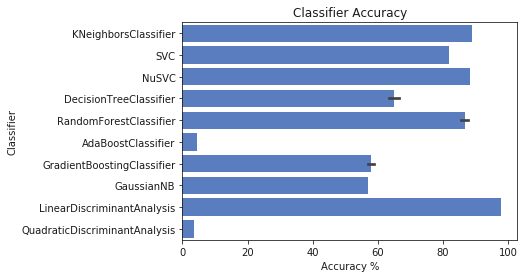

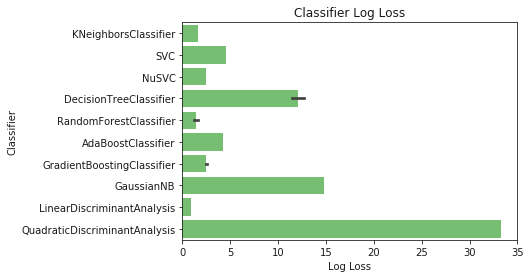

In [20]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [21]:
# Predict Test Set
favorite_clf = LinearDiscriminantAnalysis()
favorite_clf.fit(X_train, y_train)
test_predictions = favorite_clf.predict_proba(test)

# Format DataFrame
submission = pd.DataFrame(test_predictions, columns=classes)
submission.insert(0, 'id', test_ids)
submission.reset_index()

# Export Submission
submission.to_csv('submission.csv', index = False)
submission.tail()

/usr/local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:510: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
589,1576,6.204136e-54,1.449370e-01,1.475659e-90,5.132873e-26,9.010706e-52,2.352036e-90,1.112248e-124,1.322167e-25,1.359639e-01,...,6.361381e-123,8.130237e-71,6.622506e-119,6.481666e-36,3.403272e-53,2.003573e-07,1.449370e-01,5.771493e-90,2.630176e-171,9.962496e-22
590,1577,1.900531e-37,1.045995e-99,1.557514e-158,9.196877e-06,0.000000e+00,9.698483e-80,5.454368e-98,2.602529e-02,1.802151e-03,...,9.096270e-106,5.837029e-63,7.400703e-56,8.551145e-50,1.944157e-01,1.944157e-01,2.143120e-56,4.441785e-81,2.147924e-160,2.632177e-24
591,1579,4.449199e-58,1.228800e-140,4.226146e-102,9.938732e-15,0.000000e+00,9.061245e-61,2.290520e-121,8.680465e-80,8.649427e-82,...,1.591167e-186,8.930755e-88,7.286240e-108,2.605949e-68,2.329933e-68,1.002354e-60,4.917214e-131,6.037330e-53,1.830155e-119,1.483111e-71
592,1580,6.855197e-88,1.544689e-115,4.060925e-78,4.288282e-21,3.055445e-280,1.272440e-68,4.257375e-73,1.627633e-21,1.229452e-60,...,2.971775e-146,1.124700e-41,1.138484e-130,1.546564e-34,5.196566e-59,2.251470e-29,2.210551e-90,2.047402e-39,9.591715e-145,1.501223e-67
593,1583,7.590912e-110,3.041233e-140,9.026623e-76,1.200284e-34,0.000000e+00,1.332657e-22,4.334935e-98,1.949399e-94,1.070657e-89,...,1.923710e-172,1.253209e-72,2.626739e-163,4.515194e-71,7.690334e-84,6.683678e-56,1.219989e-122,2.210387e-26,2.109889e-123,7.880288e-62
